In [56]:
import pandas as pd


In [57]:
import seaborn as sns

In [58]:
import matplotlib.pyplot as plt


In [59]:
df=pd.read_csv('/Retail and wherehouse Sale.csv')

In [60]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [61]:
df['GROSS SALE']=df['RETAIL SALES']+df['WAREHOUSE SALES']

In [62]:
df.shape

(30000, 10)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
 9   GROSS SALE        29999 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 2.3+ MB


In [64]:
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,GROSS SALE
count,30000.0,30000.000000,29999.000000,30000.000000,30000.000000,29999.000000
mean,2020.0,3.911467,6.939796,6.594058,27.431031,34.371741
std,0.0,2.836788,33.081054,27.879428,272.166085,289.875163
min,2020.0,1.000000,-0.420000,-6.000000,-3999.000000,-3999.000000
25%,2020.0,1.000000,0.000000,0.000000,0.000000,1.000000
50%,2020.0,3.000000,0.160000,0.000000,1.000000,3.000000
75%,2020.0,7.000000,2.920000,3.000000,6.000000,11.000000
max,2020.0,9.000000,2739.000000,1507.000000,18317.000000,19491.000000


In [65]:
df.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,33
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,1
RETAIL TRANSFERS,0
WAREHOUSE SALES,0
GROSS SALE,1


In [66]:
df['SUPPLIER']=df['SUPPLIER'].fillna("notknown")

In [67]:
df['RETAIL SALES']=df['RETAIL SALES'].fillna(0)

In [68]:
df['GROSS SALE']=df['GROSS SALE'].fillna(0)

In [69]:
df.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,0
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,0
RETAIL TRANSFERS,0
WAREHOUSE SALES,0
GROSS SALE,0


In [70]:
df.duplicated().sum()

np.int64(0)

In [88]:
df.nunique()

,0
YEAR,1
MONTH,4
SUPPLIER,291
ITEM CODE,15668
ITEM DESCRIPTION,15732
ITEM TYPE,8
RETAIL SALES,3657
RETAIL TRANSFERS,542
WAREHOUSE SALES,1032
GROSS SALE,5624


In [89]:
df['MONTH'].unique()

array([1, 7, 3, 9])

In [73]:
df['ITEM TYPE'].unique()

array(['WINE', 'BEER', 'LIQUOR', 'STR_SUPPLIES', 'KEGS', 'REF', 'DUNNAGE',
       'NON-ALCOHOL'], dtype=object)

In [90]:
df['MONTH'].value_counts()

,count
MONTH,
1,11987
7,11190
3,5730
9,1093


In [91]:
df['ITEM TYPE'].value_counts()

,count
ITEM TYPE,
WINE,18680
LIQUOR,5995
BEER,4217
KEGS,808
NON-ALCOHOL,216
STR_SUPPLIES,63
DUNNAGE,13
REF,8


In [96]:
top_suppliers=df.groupby("SUPPLIER")["GROSS SALE"].sum().nlargest(5).reset_index()

In [97]:
top_suppliers

,SUPPLIER,GROSS SALE
0,CROWN IMPORTS,192434.62
1,ANHEUSER BUSCH INC,147630.16
2,MILLER BREWING COMPANY,133017.58
3,HEINEKEN USA,97868.70
4,BOSTON BEER CORPORATION,39069.03


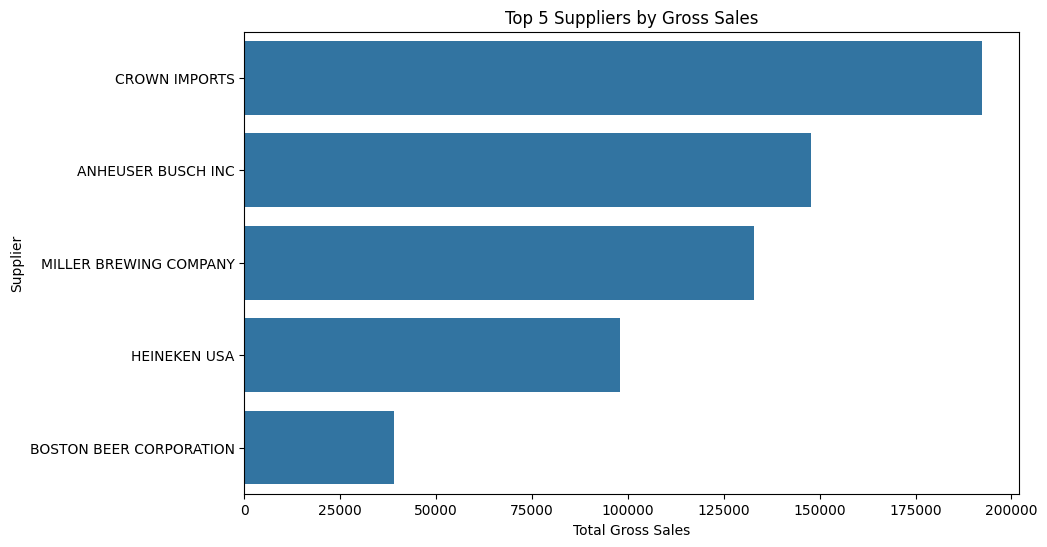

In [98]:
plt.figure(figsize=(10,6))
sns.barplot(data = top_suppliers, x='GROSS SALE', y = 'SUPPLIER')
plt.title("Top 5 Suppliers by Gross Sales")
plt.xlabel("Total Gross Sales")
plt.ylabel("Supplier")
plt.show()

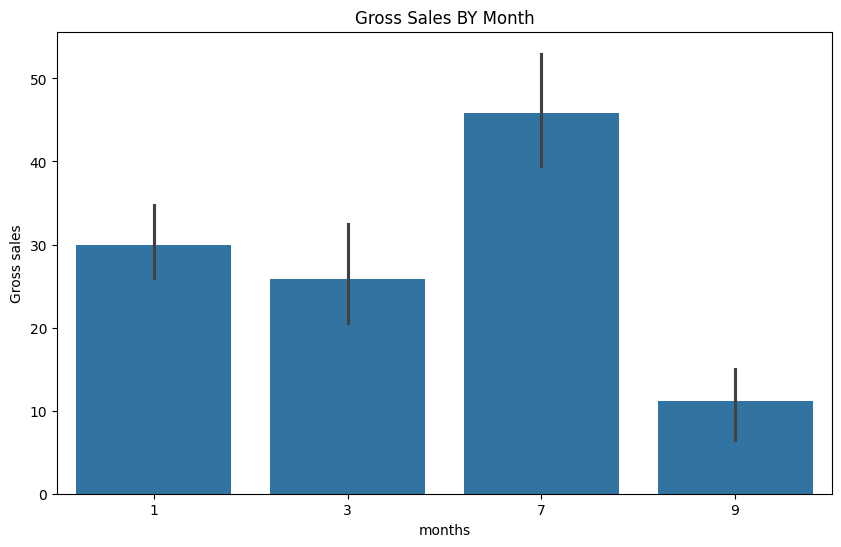

In [100]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x='MONTH', y = 'GROSS SALE')
plt.title("Gross Sales BY Month")
plt.xlabel("months")
plt.ylabel("Gross sales")
plt.show()

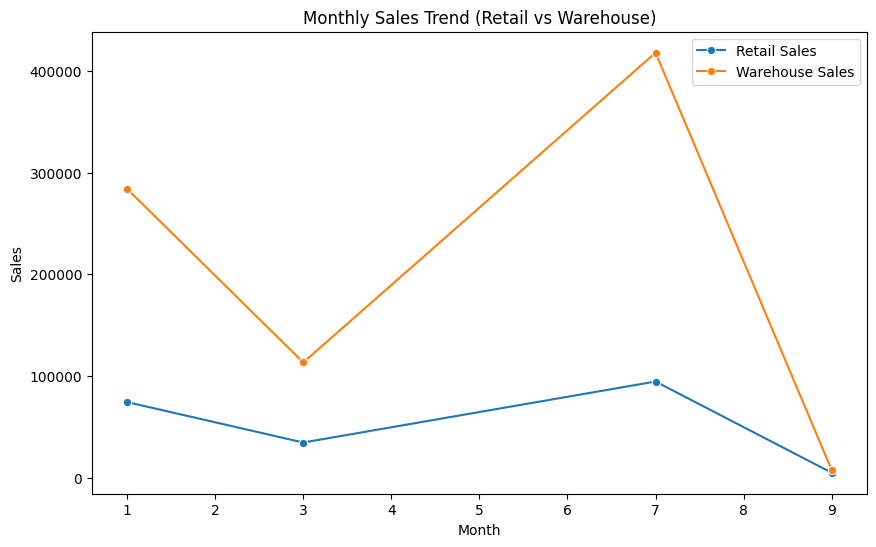

In [101]:
monthly = df.groupby("MONTH")[["RETAIL SALES","WAREHOUSE SALES"]].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly, x="MONTH", y="RETAIL SALES", marker="o", label="Retail Sales")
sns.lineplot(data=monthly, x="MONTH", y="WAREHOUSE SALES", marker="o", label="Warehouse Sales")
plt.title("Monthly Sales Trend (Retail vs Warehouse)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

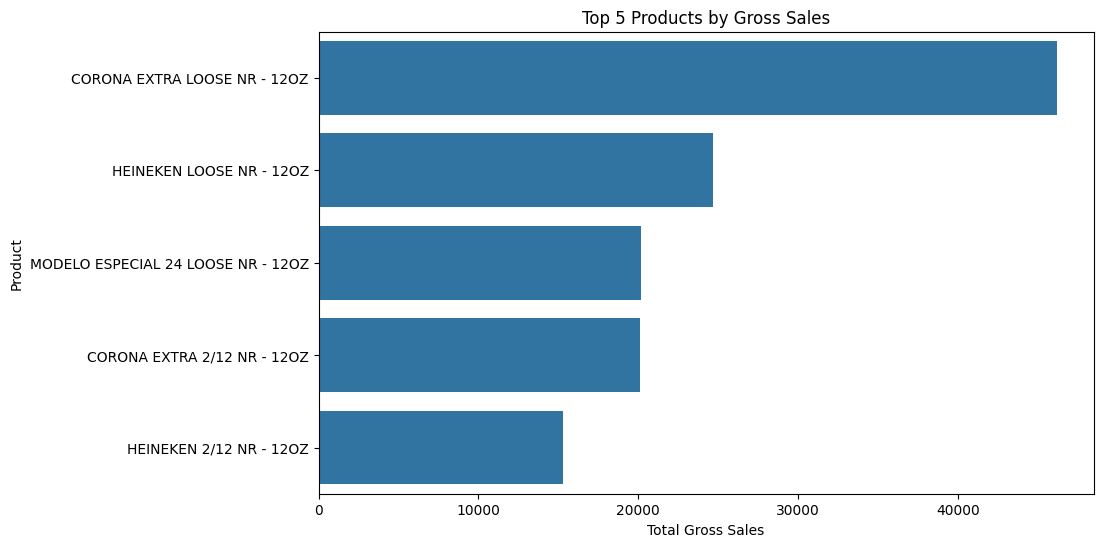

In [102]:
top_products = df.groupby("ITEM DESCRIPTION")["GROSS SALE"].sum().nlargest(5).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x="GROSS SALE", y="ITEM DESCRIPTION")
plt.title("Top 5 Products by Gross Sales")
plt.xlabel("Total Gross Sales")
plt.ylabel("Product")
plt.show()

In [106]:
item_sales = df.groupby('ITEM TYPE')['RETAIL SALES'].sum()

item_sales

,RETAIL SALES
ITEM TYPE,
BEER,59538.76
DUNNAGE,0.00
KEGS,0.00
LIQUOR,81742.85
NON-ALCOHOL,6824.62
REF,46.27
STR_SUPPLIES,345.60
WINE,59688.84


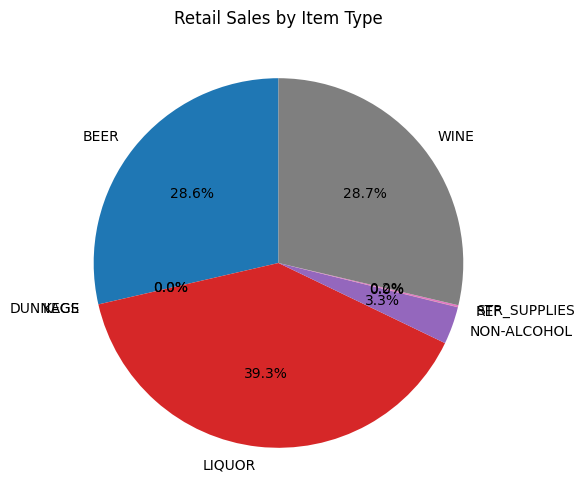

In [108]:
plt.figure(figsize=(10,6))
plt.pie(item_sales, labels=item_sales.index, autopct="%1.1f%%", startangle=90)
plt.title('Retail Sales by Item Type')
plt.show()

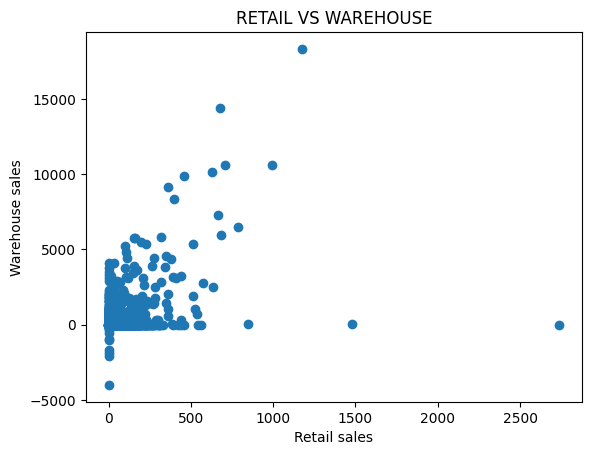

In [109]:
x = df['RETAIL SALES']
y = df['WAREHOUSE SALES']

plt.scatter(x, y)


plt.title("RETAIL VS WAREHOUSE")
plt.xlabel("Retail sales")
plt.ylabel("Warehouse sales")

plt.show()

In [120]:
data_1=df[['RETAIL SALES','WAREHOUSE SALES',
'GROSS SALE']]

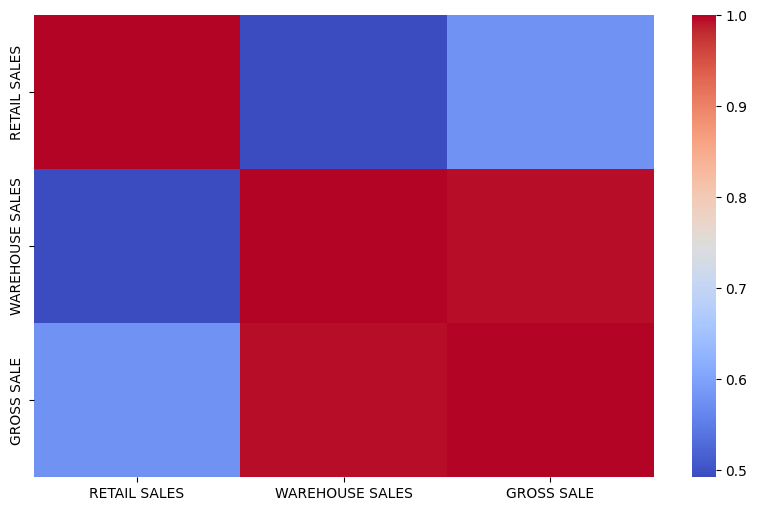

In [126]:
correlation_matrix = data_1.corr()
plt.figure(figsize = (10,6))
sns.heatmap(correlation_matrix, cmap = 'coolwarm')
plt.show()